In [1]:
import pandas as pd
from folium.plugins import HeatMap
import folium
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
import os 
filepath = os.path.join(os.getcwd(), 'dataset_grad_pres.csv')

In [3]:
df_completo = pd.read_csv(filepath, engine='python', 
                     on_bad_lines='warn', encoding='iso-8859-1', header=0, sep = ";")

In [4]:
df_completo.keys()

Index(['ANO_INGRESSO', 'SEMESTRE_INGRESSO', 'TIPO_INGRESSO', 'COTA',
       'CURSO_NOME', 'AREA', 'SITUACAO', 'MOTIVO_SAIDA', 'CAMPUS', 'TURNO',
       'ETNIA', 'SEXO', 'TIPOCURSO', 'LNG', 'LAT', 'LOCAL', 'LNG_ORGM',
       'LAT_ORGM', 'LOCAL_ORGM'],
      dtype='object')

In [5]:
df_evadidos = df_completo[df_completo['SITUACAO'] == 'Evadido']

In [11]:
# Use groupby para agrupar os dados por 'estado' e aplique a função count() para contar as linhas por estado
evadidos_por_ano = df_evadidos.groupby('ANO_INGRESSO').size().reset_index(name='Número de alunos evadidos')
evadidos_por_ano

,ANO_INGRESSO,Número de alunos evadidos
0,2008,772
1,2009,956
2,2010,1077
3,2011,1573
4,2012,1490
5,2013,1728
6,2014,2356
7,2015,2323
8,2016,2063
9,2017,2031


Coeficiente 'a': -19.983823529411758
Coeficiente 'b': 41712.8338235294


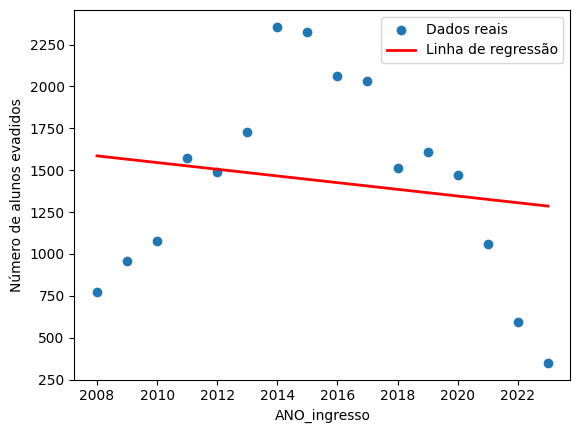

In [16]:
# Separar as variáveis independentes (x) e dependentes (y)
x = evadidos_por_ano['ANO_INGRESSO'].values.reshape(-1, 1)
y = evadidos_por_ano['Número de alunos evadidos'].values

# Inicializar o modelo de regressão linear
regressor = LinearRegression()

# Ajustar o modelo aos dados
regressor.fit(x, y)

# Obter os coeficientes 'a' e 'b'
a = regressor.coef_[0]
b = regressor.intercept_

# Imprimir os coeficientes
print(f"Coeficiente 'a': {a}")
print(f"Coeficiente 'b': {b}")

# Fazer previsões com o modelo ajustado
y_pred = regressor.predict(x)

# Plotar os dados e a linha de regressão
plt.scatter(x, y, label='Dados reais')
plt.plot(x, y_pred, color='red', linewidth=2, label='Linha de regressão')
plt.xlabel('ANO_ingresso')
plt.ylabel('Número de alunos evadidos')
plt.legend()
plt.show()

Período até 2012 - Coeficiente 'a': 205.30000000000007, Coeficiente 'b': -411479.40000000014
Período após 2012 - Coeficiente 'a': -175.6454545454546, Coeficiente 'b': 356006.9818181819


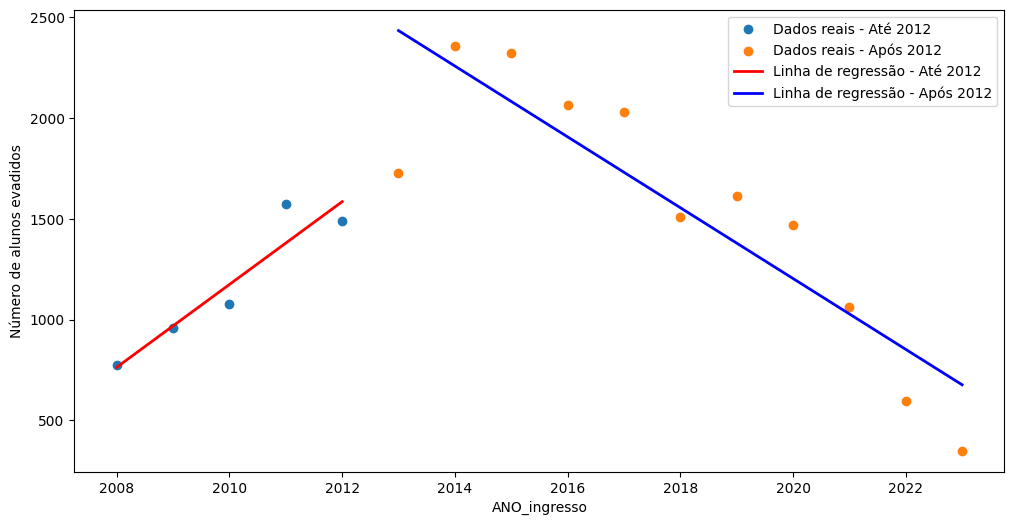

In [17]:
# Dividir os dados em dois períodos: até 2012 e após 2012
periodo_ate_2012 = evadidos_por_ano[evadidos_por_ano['ANO_INGRESSO'] <= 2012]
periodo_apos_2012 = evadidos_por_ano[evadidos_por_ano['ANO_INGRESSO'] > 2012]

# Separar as variáveis independentes (x) e dependentes (y) para cada período
x_ate_2012 = periodo_ate_2012['ANO_INGRESSO'].values.reshape(-1, 1)
y_ate_2012 = periodo_ate_2012['Número de alunos evadidos'].values

x_apos_2012 = periodo_apos_2012['ANO_INGRESSO'].values.reshape(-1, 1)
y_apos_2012 = periodo_apos_2012['Número de alunos evadidos'].values

# Inicializar e ajustar o modelo de regressão linear para o período até 2012
regressor_ate_2012 = LinearRegression()
regressor_ate_2012.fit(x_ate_2012, y_ate_2012)

# Inicializar e ajustar o modelo de regressão linear para o período após 2012
regressor_apos_2012 = LinearRegression()
regressor_apos_2012.fit(x_apos_2012, y_apos_2012)

# Obter os coeficientes 'a' e 'b' para cada período
a_ate_2012 = regressor_ate_2012.coef_[0]
b_ate_2012 = regressor_ate_2012.intercept_

a_apos_2012 = regressor_apos_2012.coef_[0]
b_apos_2012 = regressor_apos_2012.intercept_

# Imprimir os coeficientes para cada período
print(f"Período até 2012 - Coeficiente 'a': {a_ate_2012}, Coeficiente 'b': {b_ate_2012}")
print(f"Período após 2012 - Coeficiente 'a': {a_apos_2012}, Coeficiente 'b': {b_apos_2012}")

# Fazer previsões com os modelos ajustados para cada período
y_pred_ate_2012 = regressor_ate_2012.predict(x_ate_2012)
y_pred_apos_2012 = regressor_apos_2012.predict(x_apos_2012)

# Plotar os dados e as linhas de regressão para cada período
plt.figure(figsize=(12, 6))
plt.scatter(x_ate_2012, y_ate_2012, label='Dados reais - Até 2012')
plt.scatter(x_apos_2012, y_apos_2012, label='Dados reais - Após 2012')
plt.plot(x_ate_2012, y_pred_ate_2012, color='red', linewidth=2, label='Linha de regressão - Até 2012')
plt.plot(x_apos_2012, y_pred_apos_2012, color='blue', linewidth=2, label='Linha de regressão - Após 2012')
plt.xlabel('Ano de Ingresso')
plt.ylabel('Número de alunos evadidos')
plt.legend()
plt.show()

In [21]:
#Análise R².  
score = regressor_ate_2012.score(x_ate_2012, y_ate_2012)
print(score)

0.8825102618714246


In [22]:
#Análise R².  
score = regressor_apos_2012.score(x_apos_2012, y_apos_2012)
print(score)

0.7758964239152165
